<a href="https://colab.research.google.com/github/mzagoska/II/blob/main/ML_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.4 MB 7.7 MB/s 


In [2]:
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm
from google.colab import files
from IPython.display import Image
import cv2

In [3]:
gen_Booth = 1000 #общее количество поколений для сравнения алгоритмов
pop_Booth = 100 #общее количество популяций в 1 поколении для сравнения алгоритмов

def BoothFunction(x, y):
    return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)

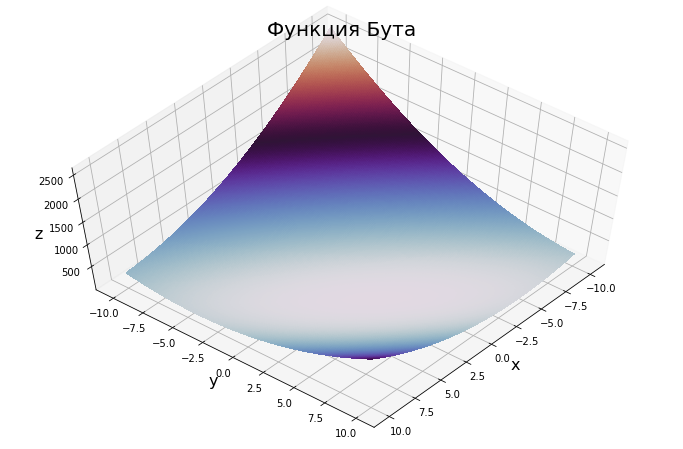

In [4]:
xDraw = np.linspace(-10, 10, num=200)
yDraw = np.linspace(-10, 10, num=200)
X, Y = np.meshgrid(xDraw, yDraw) 
Z = BoothFunction(X, Y)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=False)
ax.view_init(60, 40)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Бута', fontsize=20)
plt.show()
     

In [5]:
class Booth():
  @staticmethod
  def fitness(x):
    return [BoothFunction(x[0], x[1])]

  @staticmethod
  def get_bounds():
    return ([-10, 10], [10, 10])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

algo = pg.algorithm(pg.sga(gen=gen_Booth))
prob = pg.problem(Booth())
pop = pg.population(prob, pop_Booth)
pop = algo.evolve(pop)
print("Глобальный минимум функции Бута генетическим алгоритмом для ", gen_Booth, " поколений и ", pop_Booth, " популяций: ", pop.champion_f)

Глобальный минимум функции Бута генетическим алгоритмом для  1000  поколений и  100  популяций:  [88.2]


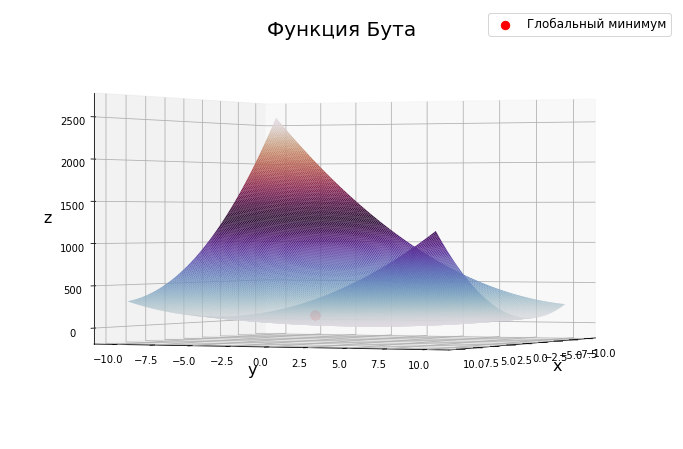

In [6]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='twilight', linewidth=1, antialiased=True)
ax.view_init(0, 25)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Бута', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(x, y, z, s=70, c='r', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

In [7]:
algo = pg.algorithm(pg.sga(gen=1))
prob = pg.problem(Booth())
pop=None

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-10,10), ylim=(-10,10), zlim=(0, 2500))

ax.plot_wireframe(X, Y, Z, alpha=0.4)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Бута', fontsize=20, fontweight=10, loc='left')

points, = ax.plot([], [], [], linestyle='None', marker='o', markersize=10, c='red', markeredgecolor='black', label='Глобальный минимум')
ax.legend(fontsize=12)
text_template = "Поколение #%s"
text = ax.text(0, 0, 0, '', fontsize=16, transform=ax.transAxes)

def init_func():
  points.set_data_3d([], [], [])
  text.set_text(text_template % 0)
  return points, text

def animate(i):
  global pop
  if i==1:
    pop = pg.population(prob, size=200)
  else:
    pop = algo.evolve(pop)

  x = pop.get_x()[:,0]
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  points.set_data_3d(x, y, z)
  text.set_text(text_template % i)
  return points, text

get_animation = animation.FuncAnimation(fig, animate, np.arange(1,15), init_func=init_func, interval=300, blit=False, repeat_delay=1000)
plt.close()
rc('animation', html='html5')
get_animation

In [8]:
algo = pg.algorithm(pg.sade(gen=gen_Booth))
prob = pg.problem(Booth())
pop = pg.population(prob, pop_Booth)
pop = algo.evolve(pop)
print("Глобальный минимум функции Бута алгоритмом самоадаптивной дифференциальной эволюции для ", gen_Booth, " поколений и ", pop_Booth, " популяций: ", pop.champion_f)

Глобальный минимум функции Бута алгоритмом самоадаптивной дифференциальной эволюции для  1000  поколений и  100  популяций:  [88.2]


In [10]:
gen_Matyas = 1000 #общее количество поколений для сравнения алгоритмов
pop_Matyas = 100 #общее количество популяций в 1 поколении для сравнения алгоритмов

def Matyas(x: np.array, y: np.array):
    return 0.26*(x*x + y*y) - 0.48*x*y

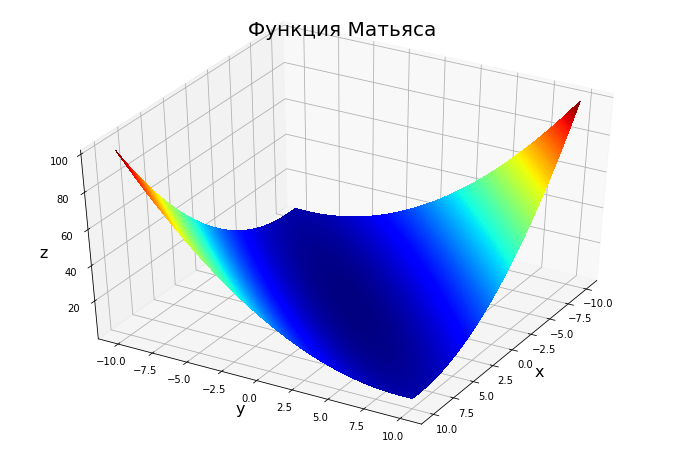

In [11]:
xDraw = np.linspace(-10, 10, num=400)
yDraw = np.linspace(-10, 10, num=400)
X, Y = np.meshgrid(xDraw, yDraw) 
Z = Matyas(X, Y)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', linewidth=1, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Матьяса', fontsize=20)
plt.show()

In [12]:
class Matyas():
  @staticmethod
  def fitness(x):
    return [0.26*(x[0]*x[0] +x[1]*x[1])-0.48*x[0]*x[1]]

  @staticmethod
  def get_bounds():
    return ([-10, -10], [10, 10])

  @staticmethod
  def gradient(self, x):
        return pg.estimate_gradient_h(lambda x: self.fitness(x), x)

algo = pg.algorithm(pg.sga(gen=gen_Matyas))
prob = pg.problem(Matyas())
pop = pg.population(prob, pop_Matyas)
pop = algo.evolve(pop)
print("Глобальный минимум функции Матьяса генетическим алгоритмом для ", gen_Matyas, " поколений и ", pop_Matyas, " популяций: ", pop.champion_f)

Глобальный минимум функции Матьяса генетическим алгоритмом для  1000  поколений и  100  популяций:  [0.0019462]


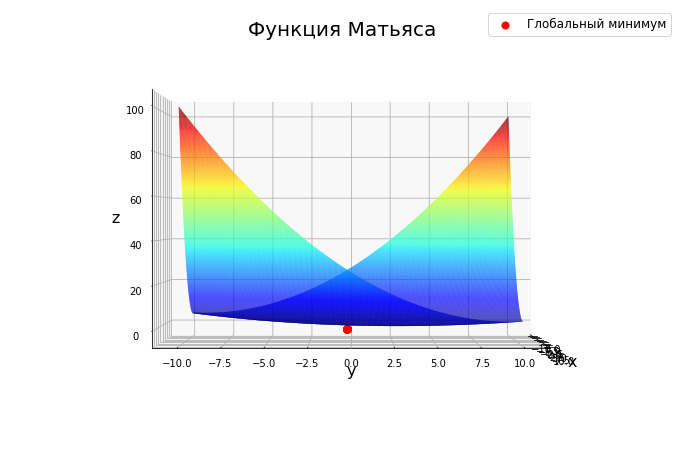

In [13]:
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='jet', linewidth=1, antialiased=True)
ax.view_init(0, 0)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Матьяса', fontsize=20)
x = pop.get_x()[:,0]
y = pop.get_x()[:,0]
z = pop.get_f()[:,0]
ax.scatter3D(8, y, z, s=50, c='r', label ='Глобальный минимум')
ax.legend(fontsize=12)
plt.show()

In [14]:
algo = pg.algorithm(pg.sga(gen=2))
prob = pg.problem(Matyas())
pop=None

fig = plt.figure(figsize=(12,10))
ax = fig.gca(projection='3d')
ax = fig.add_subplot(111, projection='3d', autoscale_on=False, xlim=(-10, 10), ylim=(-10, 10), zlim=(0, 100))

ax.plot_wireframe(X, Y, Z)
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
ax.set_title('Функция Матьяса', fontsize=20, fontweight=10, loc='left')
ax.view_init(0, 0)

points, = ax.plot([], [], [], linestyle='None', marker='o', markersize=10, c='red', markeredgecolor='black', label='Глобальный минимум')
ax.legend(fontsize=12)
text_template = "Поколение #%s"
text = ax.text(0, 0, 0, '', fontsize=16, transform=ax.transAxes)

def init_func():
  points.set_data_3d([], [], [])
  text.set_text(text_template % 0)
  return points, text

def animate(i):
  global pop
  if i==1:
    pop = pg.population(prob, size=200)
  else:
    pop = algo.evolve(pop)

  x = 0
  y = pop.get_x()[:,0]
  z = pop.get_f()[:,0]
  points.set_data_3d(x, y, z)
  text.set_text(text_template % i)
  return points, text

get_animation = animation.FuncAnimation(fig, animate, np.arange(1,12), init_func=init_func, interval=300, blit=False, repeat_delay=1000)
plt.close()
rc('animation', html='html5')
get_animation

/usr/local/lib/python3.8/dist-packages/mpl_toolkits/mplot3d/proj3d.py:189: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


In [15]:
algo = pg.algorithm(pg.sade(gen=gen_Matyas))
prob = pg.problem(Matyas())
pop = pg.population(prob, pop_Matyas)
pop = algo.evolve(pop)
print("Глобальный минимум функции Матьяса алгоритмом самоадаптивной дифференциальной эволюции для ", gen_Matyas, " поколений и ", pop_Matyas, " популяций: ", pop.champion_f)
     

Глобальный минимум функции Матьяса алгоритмом самоадаптивной дифференциальной эволюции для  1000  поколений и  100  популяций:  [5.70174449e-11]


In [16]:
uploaded = files.upload()

Saving IM.jpg to IM.jpg


(360, 640)


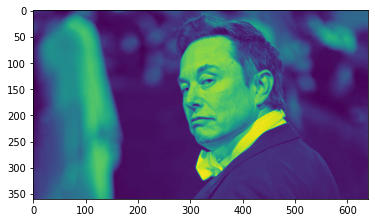

In [20]:
img_path = "IM.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)
print(img.shape)

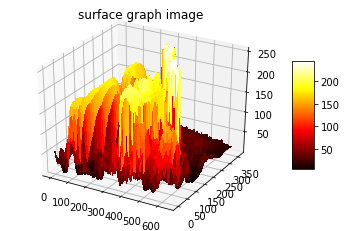

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 640, 1)
Y = np.arange(0, 360, 1)
X, Y = np.meshgrid(X, Y)
my_cmap = plt.get_cmap("hot")
surf = ax.plot_surface(X, Y, img, linewidth=0,cmap = my_cmap, edgecolor ="none", antialiased=False)
                       


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('surface graph image')
plt.show()

In [29]:
class Image:
    def __init__(self, img):
        self.dim = 2
        self.data = img
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.data[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0] * self.dim, [359, 639])

In [30]:
prob = pg.problem(Image(img))
print(prob)

Problem name: <class '__main__.Image'>
	C++ class name: pybind11::object

	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [359, 639]
	Has batch fitness evaluation: false

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none



In [31]:
algo = pg.algorithm(pg.bee_colony(gen = 200, limit = 200))
pop = pg.population(prob, size = 50)
pop = algo.evolve(pop)
print("Результат работы алгоритма для задачи:", pop.champion_f)

Результат работы алгоритма для задачи: [2.]
